In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## Original Data

In [2]:
data = pd.DataFrame({
    'Country': ['EU', 'US', 'China', 'Korea', 'UK', 'Japan'],
    'Centralization': [3, 1, 5, 3, 2, 2],         
    'Transparency': [5, 2, 1, 4, 3, 3],           
    'Accountability': [5, 2, 2, 3, 2, 2],         
    'Innovation_Support': [3, 5, 4, 4, 3, 4],     
    'Risk_Management': [5, 3, 3, 4, 3, 3],        
    'Stakeholder_Engagement': [5, 2, 1, 3, 3, 3], 
    'Technological_Capacity': [3, 4, 5, 5, 3, 4]  
})

features = data.columns[1:]
X = data[features]

## Standardize and PCA

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

## KMeans Clustering

In [14]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)
data['Cluster'] = clusters

for i in sorted(data['Cluster'].unique()):
    cluster_countries = data[data['Cluster'] == i]['Country'].tolist()
    print(f"Cluster {i} : {cluster_countries}")

Cluster 0 : ['China']
Cluster 1 : ['US', 'Korea', 'UK', 'Japan']
Cluster 2 : ['EU']


C:\Users\yhj59\miniconda3\envs\sophie\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## Calculate Cluster Averages

In [13]:
clustered_data = data.copy()
cluster_means = clustered_data.groupby('Cluster')[features].mean()

## Radar Chart per Cluster

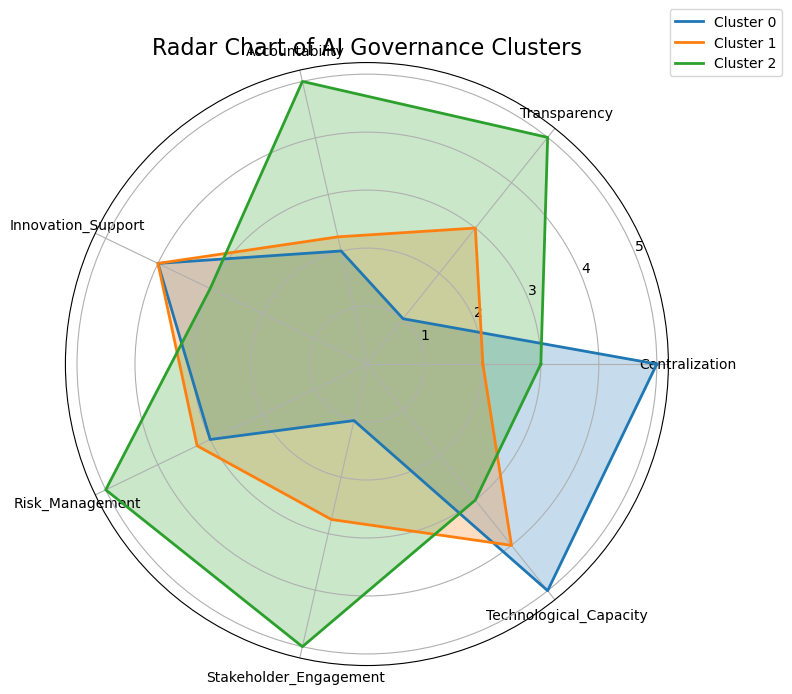

In [11]:
labels = features.tolist()
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close the loop

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for idx, row in cluster_means.iterrows():
    values = row.tolist()
    values += values[:1]  # close the loop
    ax.plot(angles, values, label=f'Cluster {idx}', linewidth=2)
    ax.fill(angles, values, alpha=0.25)

ax.set_thetagrids(np.degrees(angles[:-1]), labels)

ax.set_title('Radar Chart of AI Governance Clusters', size=16)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

plt.tight_layout()
plt.show()

The radar chart clearly differentiates three clusters of AI governance styles:

Cluster 0, represented solely by China, shows a highly centralized and technologically advanced approach, with minimal stakeholder engagement or transparency.

Cluster 1, including the US, Korea, the UK, and Japan, follows a more pragmatic balance between innovation and governance, scoring moderately across all variables.

Cluster 2, represented by the EU, stands out for its strong emphasis on transparency, accountability, and stakeholder involvement, though with relatively moderate technological capacity.

These patterns reflect divergent regulatory philosophies: centralized control, innovation pragmatism, and normative governance.